## Predicting the churn of customers in the telecom sector

### import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Import dataset

In [2]:
ds = pd.read_csv("C:\\Users\\shash\\Desktop\\Machine Learning A-Z (Codes and Datasets)\\Datasets for projects\\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
ds.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
ds.shape

(7043, 21)

In [5]:
ds.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
ds.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Check the descriptive statistics of numeric variables

In [7]:
ds.describe([0.25, 0.5, 0.75, 0.9])

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
90%,1.000000,69.000000,102.600000
max,1.000000,72.000000,118.750000


SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer

75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 75% customers pay more than USD 89.85 per month

Text(0.5, 1.0, 'Count of TARGET Variable per category')

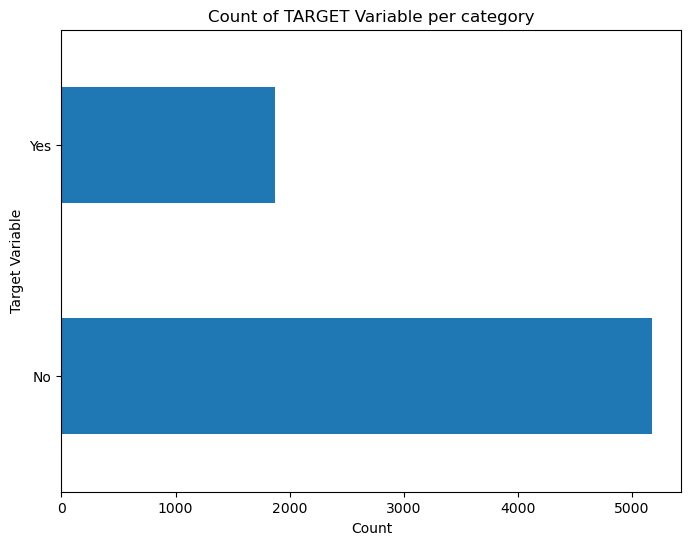

In [8]:
ds['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count")
plt.ylabel("Target Variable")
plt.title("Count of TARGET Variable per category")

In [9]:
100*ds['Churn'].value_counts()/len(ds['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

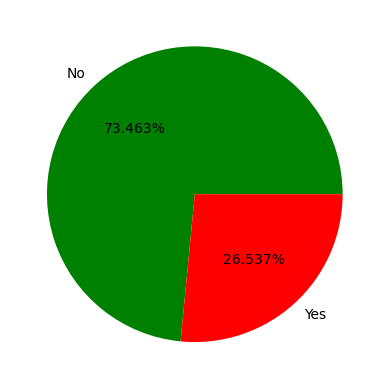

In [10]:
plt.pie(x=ds.Churn.value_counts(), labels = ds.Churn.unique(), autopct = '%.3f%%', colors = ['g', 'r'])
plt.show()

from the above visuals we can infer that Data is highly imbalanced, ratio = 73:27
So we analyse the data with other features while taking the target values separately to get some insights.

Summary of the dataframe

In [11]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Missing Data - Initial Intuition

Here, we don't have any missing data.

General Thumb Rules:

1. For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
2. For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
3. As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here, for example, Is_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely.

### data cleaning

#### 1. Create a copy of base data for manupulation & processing

In [12]:
ds_dup=ds.copy()

#### 2. Total Charges should be numeric amount. Let's convert it to numerical data type

In [13]:
ds_dup.TotalCharges=pd.to_numeric(ds_dup.TotalCharges, errors = 'coerce')

In [14]:
ds_dup.TotalCharges.dtype

dtype('float64')

#### 3. Check the presence of null values in df

In [15]:
ds.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

note: though there are null values in the dataset but it is not getting reflected here in the above...There is some problem with it

#### 4. Examining the records of null values

In [16]:
ds_dup.loc[ds_dup['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


#### 5. Missing Value Treatment

Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [17]:
ds_dup.dropna(how = 'any', axis = 0, inplace = True)

#### 6. Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [18]:
# Get the max tenure
ds_dup.tenure.max()

72

In [19]:
# Group the tenure in bins of 12 months
bins = [f"{i} - {i+11}" for i in range(1, 72, 12)]
bins

['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72']

In [20]:
ds_dup['tenure_group'] = pd.cut(x=ds_dup['tenure'], bins = range(1,80,12), right = False, labels = bins )

In [21]:
ds_dup.tenure_group.value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

#### 7. Remove columns not required for processing

In [22]:
ds_dup.drop(columns= ['customerID','tenure'], axis=1, inplace=True)

### Data Exploration

#### 1. Plot distibution of individual predictors by churn

#### Univariate analysis

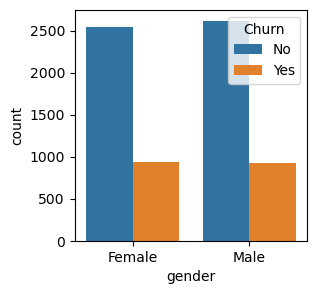

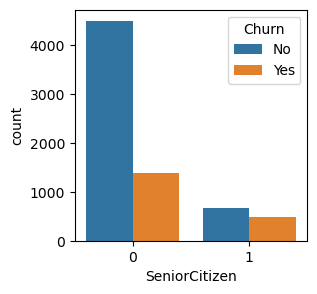

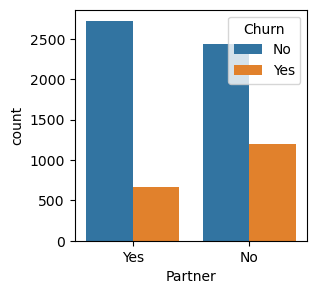

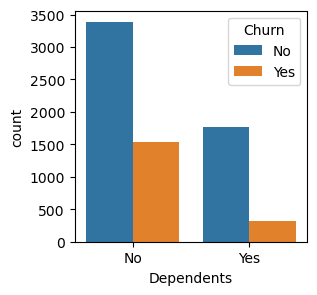

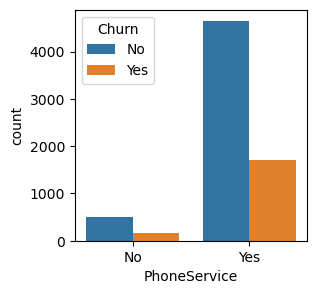

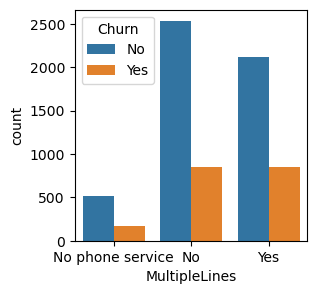

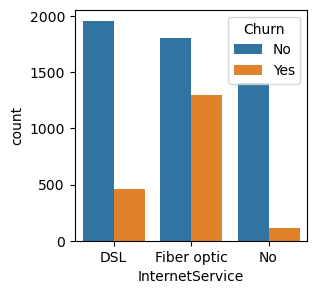

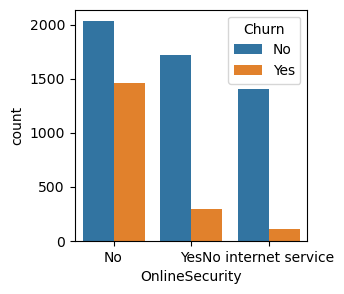

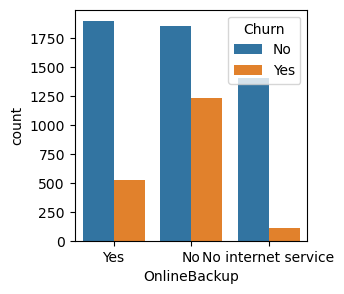

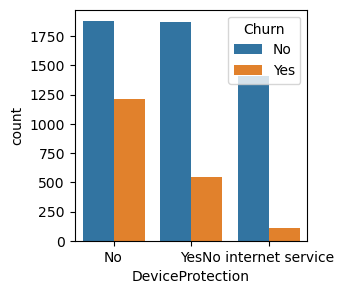

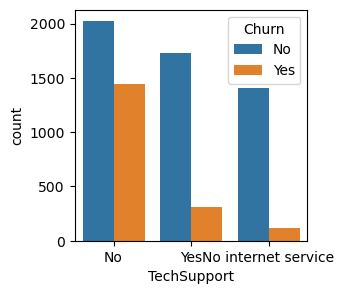

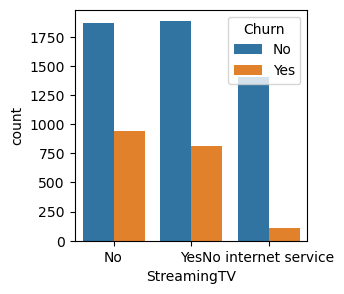

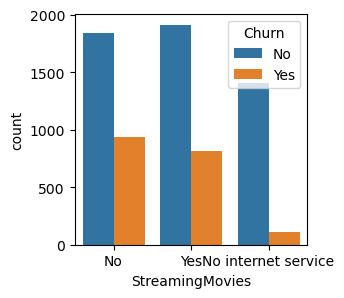

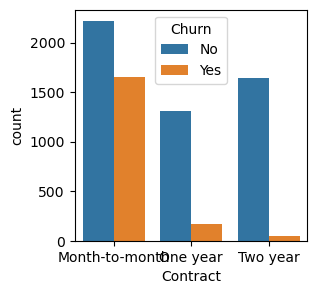

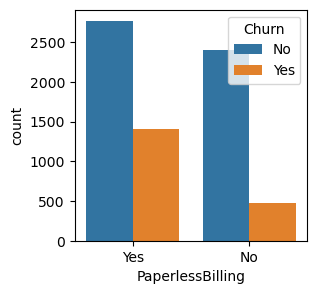

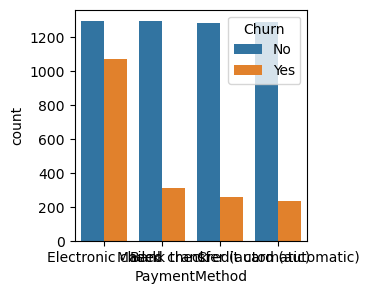

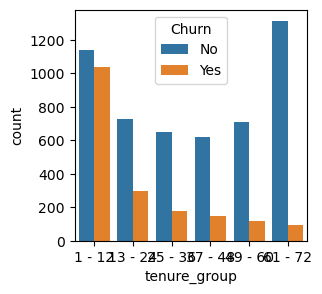

In [23]:
for index, col in enumerate(ds_dup.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    
    plt.figure(index, figsize=(3,3))
    
    sns.countplot(data = ds_dup, x = col, hue = 'Churn')
   

2. Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0

#### 2. Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0

In [24]:
ds_dup['Churn']=np.where(ds_dup["Churn"]=='Yes', 1, 0)

#### 3. Convert all the categorical variables into dummy variables

In [25]:
ds_dup_dummies = pd.get_dummies(ds_dup)
ds_dup_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


#### 4. Relationship between Monthly Charges and Total Charges

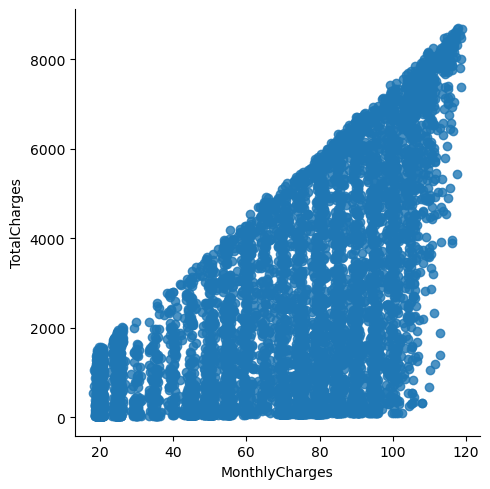

In [26]:
sns.lmplot(data = ds_dup_dummies, x = 'MonthlyCharges', y = "TotalCharges", fit_reg = False)
plt.show()

Total Charges increase as Monthly Charges increase - as expected

#### 5. Churn by Monthly Charges, Total Charges and Tenure

Text(0.5, 1.0, 'Monthly Charges by churn')

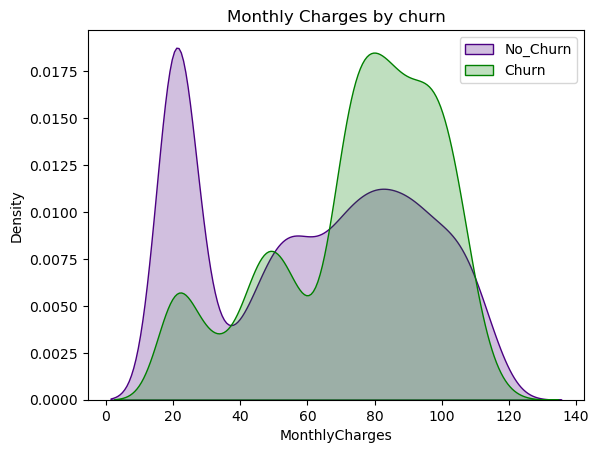

In [27]:
sns.kdeplot(ds_dup_dummies.MonthlyCharges[(ds_dup_dummies['Churn']==0)], color = 'indigo', shade = True)
sns.kdeplot(ds_dup_dummies.MonthlyCharges[(ds_dup_dummies['Churn']==1)], color = 'green', shade = True)
plt.legend(['No_Churn', 'Churn'], loc = 'upper right')
plt.title('Monthly Charges by churn')


Insight: Churn is high when Monthly Charges ar high

Text(0.5, 1.0, 'Total Charges by Churn')

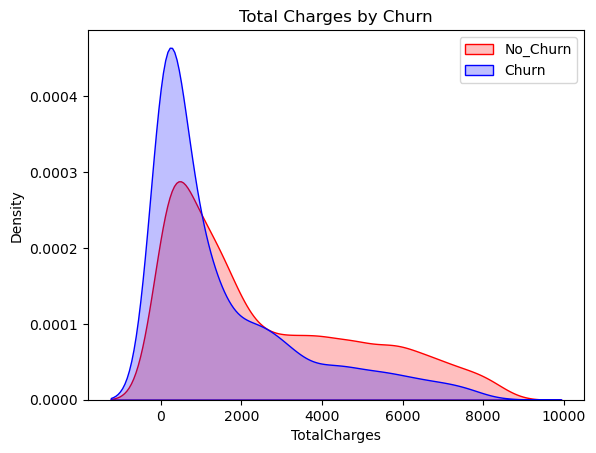

In [28]:
sns.kdeplot(ds_dup_dummies.TotalCharges[(ds_dup_dummies['Churn']==0)], color = 'red', shade = True)
sns.kdeplot(ds_dup_dummies.TotalCharges[(ds_dup_dummies['Churn']==1)], color = 'blue', shade = True)
plt.legend(['No_Churn', 'Churn'], loc = 'upper right')
plt.title('Total Charges by Churn')

insight: as higher Churn at lower Total Charges

In [29]:
ds_dup_dummies.rename(columns={'tenure_group_1 - 12':'tenure_one_twelve', 
                        'tenure_group_13 - 24':'tenure_thirteen_twentyfour',
                        'tenure_group_25 - 36':'tenure_twentyfive_thirtysix',
                        'tenure_group_37 - 48':'tenure_thirtyseven_fourtyeight',
                        'tenure_group_49 - 60':'tenure_fourtynine_sixty',
                        'tenure_group_61 - 72':'tenure_sixtyone_seventytwo'
                        }, inplace = True)

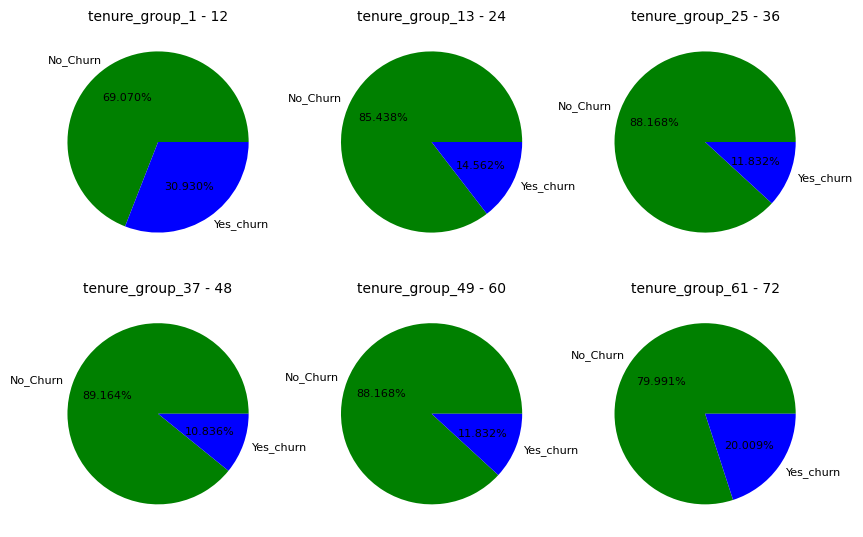

In [30]:
plt.figure(figsize=(10,10),dpi = 100)

plt.subplot(3, 3, 1)
plt.pie(ds_dup_dummies.tenure_one_twelve.value_counts()[(ds_dup_dummies['Churn']==0)], autopct='%.3f%%', colors = ['g', 'b'], labels=['No_Churn', 'Yes_churn'], textprops={"fontsize":8})
plt.title("tenure_group_1 - 12", fontdict={'fontsize':10})

plt.subplot(3, 3, 2)
plt.pie(ds_dup_dummies.tenure_thirteen_twentyfour.value_counts()[(ds_dup_dummies['Churn']==0)], autopct='%.3f%%', colors = ['g', 'b'], labels=['No_Churn', 'Yes_churn'], textprops={"fontsize":8})
plt.title("tenure_group_13 - 24", fontdict={'fontsize':10})

plt.subplot(3, 3, 3)
plt.pie(ds_dup_dummies.tenure_twentyfive_thirtysix.value_counts()[(ds_dup_dummies['Churn']==0)], autopct='%.3f%%', colors = ['g', 'b'], labels=['No_Churn', 'Yes_churn'], textprops={"fontsize":8})
plt.title("tenure_group_25 - 36", fontdict={'fontsize':10})

plt.subplot(3, 3, 4)
plt.pie(ds_dup_dummies.tenure_thirtyseven_fourtyeight.value_counts()[(ds_dup_dummies['Churn']==0)], autopct='%.3f%%', colors = ['g', 'b'], labels=['No_Churn', 'Yes_churn'], textprops={"fontsize":8})
plt.title("tenure_group_37 - 48", fontdict={'fontsize':10})

plt.subplot(3, 3, 5)
plt.pie(ds_dup_dummies.tenure_fourtynine_sixty.value_counts()[(ds_dup_dummies['Churn']==0)], autopct='%.3f%%', colors = ['g', 'b'], labels=['No_Churn', 'Yes_churn'], textprops={"fontsize":8})
plt.title("tenure_group_49 - 60", fontdict={'fontsize':10})

plt.subplot(3, 3, 6)
plt.pie(ds_dup_dummies.tenure_sixtyone_seventytwo.value_counts()[(ds_dup_dummies['Churn']==0)], autopct='%.3f%%', colors = ['g', 'b'], labels=['No_Churn', 'Yes_churn'], textprops={"fontsize":8})
plt.title("tenure_group_61 - 72", fontdict={'fontsize':10})

plt.show()

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.

In [31]:
ds_dup_dummies['tenure_sixtyone_seventytwo'].value_counts()

0    5625
1    1407
Name: tenure_sixtyone_seventytwo, dtype: int64

#### 6. Build a corelation of all predictors with 'Churn'

<AxesSubplot:>

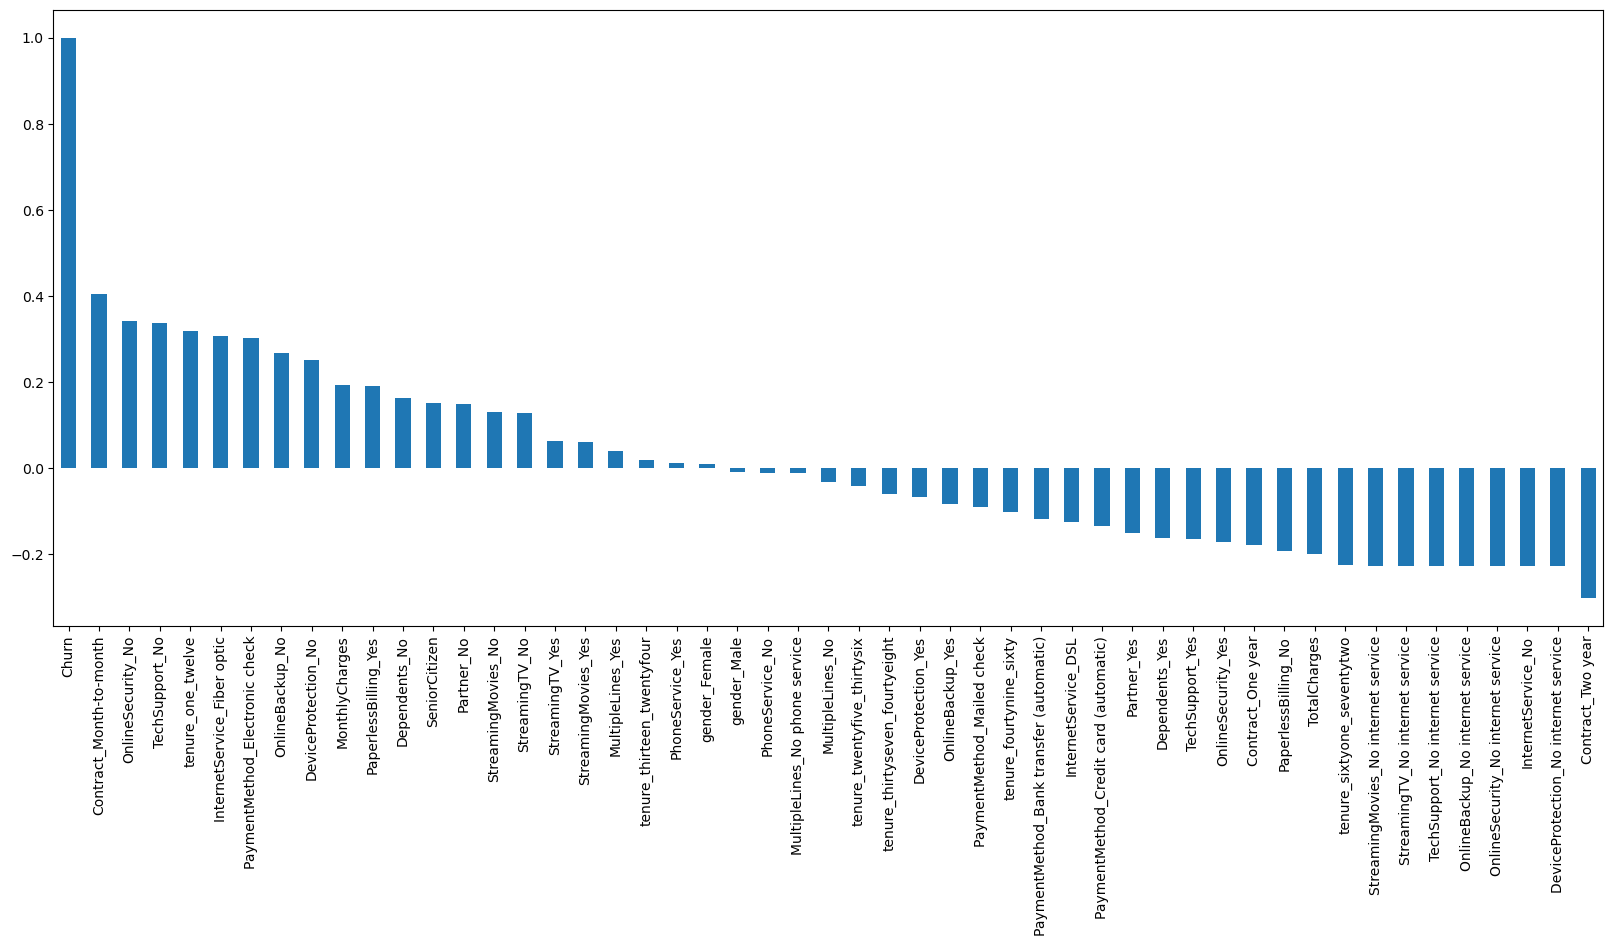

In [32]:
plt.figure(figsize=(20,8))
ds_dup_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Derived Insight:

HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn


<AxesSubplot:>

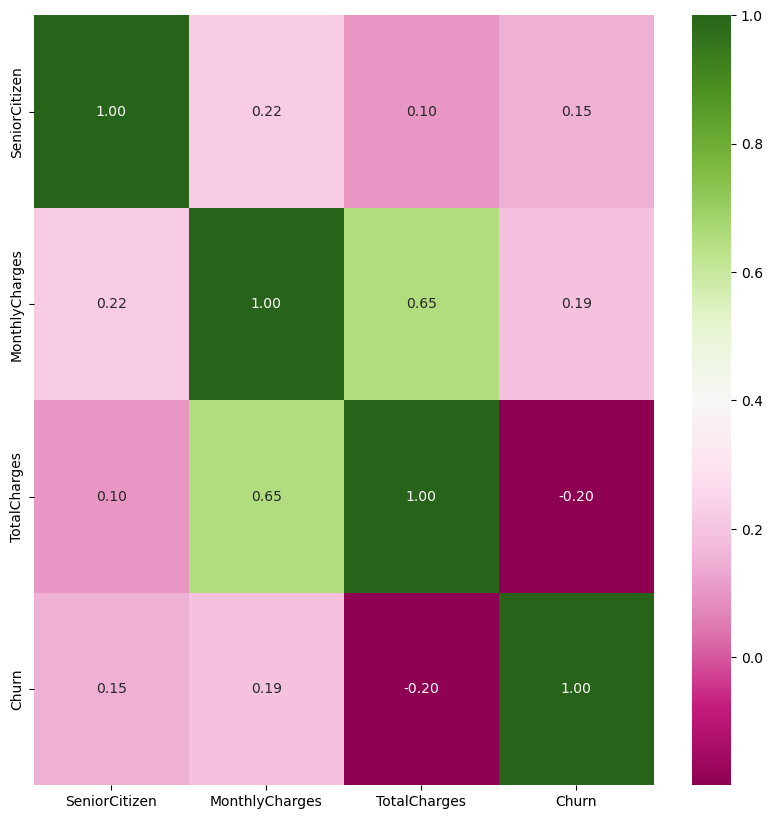

In [33]:
plt.figure(figsize = (10,10))
sns.heatmap(ds_dup.corr(method= 'pearson'), cmap = 'PiYG', annot = True, fmt = '.2f')

### Model Building

In [34]:
ds_m = ds_dup_dummies

In [35]:
ds_m

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_one_twelve,tenure_thirteen_twentyfour,tenure_twentyfive_thirtysix,tenure_thirtyseven_fourtyeight,tenure_fourtynine_sixty,tenure_sixtyone_seventytwo
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,1990.50,0,0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0
7039,0,103.20,7362.90,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
7040,0,29.60,346.45,0,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
7041,1,74.40,306.60,1,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0


### Feature selection

In [36]:
x = ds_m.drop(['Churn'], axis = 1)
x.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_one_twelve,tenure_thirteen_twentyfour,tenure_twentyfive_thirtysix,tenure_thirtyseven_fourtyeight,tenure_fourtynine_sixty,tenure_sixtyone_seventytwo
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [37]:
y = ds_m['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

### Seggregation of Training and testing data

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

### Decision Tree Classification

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [41]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [42]:
model_dt.score(x_test,y_test)

0.7931769722814499

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       996
           1       0.68      0.56      0.61       411

    accuracy                           0.79      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.79      0.79      0.79      1407



In [44]:
print(confusion_matrix(y_test, y_pred))

[[885 111]
 [180 231]]


### SMOTEENN for DT

In [45]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN(random_state=0)
x_train_re, y_train_re = sm.fit_resample(x_train, y_train)

In [46]:
x_train_re.shape, y_train_re.shape

((4795, 50), (4795,))

In [47]:
len(y_train[y_train==0]),len(y_train[y_train==1])

(4167, 1458)

In [48]:
len(y_train_re[y_train_re==0]),len(y_train_re[y_train_re==1])

(2172, 2623)

In [49]:
model_dt_smote = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=6, min_samples_leaf=8)

model_dt_smote.fit(x_train_re, y_train_re)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [50]:
y_smote_predict = model_dt_smote.predict(x_test)

In [51]:
print(classification_report(y_test, y_smote_predict))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82       996
           1       0.57      0.79      0.66       411

    accuracy                           0.77      1407
   macro avg       0.73      0.77      0.74      1407
weighted avg       0.80      0.77      0.77      1407



In [52]:
print(confusion_matrix(y_test, y_smote_predict))

[[753 243]
 [ 87 324]]


### Random Forest Classification

In [53]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100, max_depth=6, min_samples_leaf=8)

In [54]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [55]:
y_pred=model_rf.predict(x_test)

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86       996
           1       0.74      0.44      0.55       411

    accuracy                           0.79      1407
   macro avg       0.77      0.69      0.71      1407
weighted avg       0.79      0.79      0.77      1407



In [57]:
print(confusion_matrix(y_test, y_pred))

[[933  63]
 [229 182]]


### SMOTEENN for RF

In [58]:
model_rf_smote = RandomForestClassifier(criterion = "gini", random_state = 100, max_depth=6, min_samples_leaf=8)

model_rf_smote.fit(x_train_re, y_train_re)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [59]:
y_rf_smote_predict = model_rf_smote.predict(x_test)

In [60]:
print(classification_report(y_test, y_rf_smote_predict))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81       996
           1       0.55      0.79      0.65       411

    accuracy                           0.75      1407
   macro avg       0.72      0.76      0.73      1407
weighted avg       0.80      0.75      0.76      1407



In [61]:
print(confusion_matrix(y_test, y_rf_smote_predict))

[[736 260]
 [ 87 324]]


### Support Vector Classification

In [62]:
from sklearn.svm import SVC
model_svc = SVC(kernel='sigmoid', random_state = 0)
model_svc.fit(x_train, y_train)

SVC(kernel='sigmoid', random_state=0)

In [63]:
y_svm_pred = model_svc.predict(x_test)

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
print(accuracy_score(y_test, y_svm_pred))

0.6417910447761194


In [66]:
print(classification_report(y_test, y_svm_pred))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75       996
           1       0.37      0.32      0.34       411

    accuracy                           0.64      1407
   macro avg       0.55      0.55      0.55      1407
weighted avg       0.63      0.64      0.63      1407



In [67]:
print(confusion_matrix(y_test, y_svm_pred))

[[772 224]
 [280 131]]


### SMOTEEN for SVM

In [68]:
from sklearn.svm import SVC
model_svc_sm = SVC(kernel='sigmoid', random_state = 0)
model_svc_sm.fit(x_train_re, y_train_re)

SVC(kernel='sigmoid', random_state=0)

In [69]:
y_sv_pred = model_svc_sm.predict(x_test)

In [70]:
print(accuracy_score(y_test, y_sv_pred))

0.49324804548685147


In [71]:
print(classification_report(y_test, y_sv_pred))

              precision    recall  f1-score   support

           0       0.72      0.47      0.57       996
           1       0.30      0.55      0.39       411

    accuracy                           0.49      1407
   macro avg       0.51      0.51      0.48      1407
weighted avg       0.59      0.49      0.52      1407



In [72]:
print(confusion_matrix(y_test, y_sv_pred))

[[468 528]
 [185 226]]


### Naive Bayes classification

In [73]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(x_train, y_train)

GaussianNB()

In [74]:
y_nb_pred = model_svc.predict(x_test)

In [75]:
print(accuracy_score(y_test, y_nb_pred))

0.6417910447761194


In [76]:
print(classification_report(y_test, y_nb_pred))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75       996
           1       0.37      0.32      0.34       411

    accuracy                           0.64      1407
   macro avg       0.55      0.55      0.55      1407
weighted avg       0.63      0.64      0.63      1407



In [77]:
print(confusion_matrix(y_test, y_nb_pred))

[[772 224]
 [280 131]]


### SMOTEEN for Naive Bayes

In [78]:
model_nb_sm = GaussianNB()
model_nb_sm.fit(x_train, y_train)

GaussianNB()

In [79]:
y_sm_nv_pred = model_nb_sm.predict(x_test)

In [80]:
print(accuracy_score(y_test, y_sm_nv_pred))

0.7107320540156361


In [81]:
print(classification_report(y_test,y_sm_nv_pred))

              precision    recall  f1-score   support

           0       0.90      0.66      0.76       996
           1       0.50      0.83      0.63       411

    accuracy                           0.71      1407
   macro avg       0.70      0.74      0.69      1407
weighted avg       0.79      0.71      0.72      1407



In [82]:
print(confusion_matrix(y_test, y_sm_nv_pred))

[[660 336]
 [ 71 340]]


### Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state=0)

In [84]:
model_lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [85]:
y_lr_pred = model_lr.predict(x_test)

In [86]:
print(accuracy_score(y_test, y_lr_pred))

0.8031272210376688


In [87]:
print(classification_report(y_test, y_lr_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       996
           1       0.74      0.50      0.60       411

    accuracy                           0.80      1407
   macro avg       0.78      0.72      0.73      1407
weighted avg       0.80      0.80      0.79      1407



In [88]:
print(confusion_matrix(y_test, y_lr_pred))

[[923  73]
 [204 207]]


### SMOTEEN for LR

In [89]:
model_lr_sm = LogisticRegression(random_state=0)
model_lr_sm.fit(x_train_re, y_train_re)
y_lr_sm_pred = model_lr_sm.predict(x_test)

In [90]:
print(accuracy_score(y_test, y_lr_sm_pred))

0.7746979388770433


In [91]:
print(classification_report(y_test, y_lr_sm_pred))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83       996
           1       0.60      0.71      0.65       411

    accuracy                           0.77      1407
   macro avg       0.73      0.75      0.74      1407
weighted avg       0.79      0.77      0.78      1407



In [92]:
print(confusion_matrix(y_test, y_lr_sm_pred))

[[800 196]
 [121 290]]


### Visualization of results

In [93]:
Methods = ['LR', 'NB', 'SVM', 'RF', 'DT']

In [94]:
accuracy_normal = [0.8, 0.64, 0.64, 0.79, 0.79]
accuracy_sm = [0.77, 0.71, 0.49, 0.75, 0.77]
           
precision_normal_0 = [0.82, 0.73, 0.73, 0.8, 0.83]
precision_sm_0 = [0.87, 0.9, 0.72, 0.89, 0.9]

precision_normal_1 = [0.74, 0.37, 0.37, 0.74, 0.68]
precision_sm_1 = [0.6, 0.5, 0.3, 0.55, 0.57]
           
recall_normal_0 = [0.93, 0.78, 0.78, 0.94, 0.89]
recall_sm_0 = [0.8, 0.66, 0.47, 0.74, 0.76]

recall_normal_1 = [0.5, 0.32, 0.32, 0.44, 0.56]
recall_sm_1 = [0.71, 0.83, 0.55, 0.79, 0.79]
           
f1_normal_0 = [0.87, 0.75, 0.75, 0.86, 0.86]
f1_sm_0 = [0.83, 0.76, 0.57, 0.81, 0.82]

f1_normal_1 = [0.6, 0.34, 0.34, 0.55, 0.61]
f1_sm_1 = [0.65, 0.63, 0.39, 0.65, 0.66]

In [95]:
xpos=np.arange(len(Methods))
xpos

array([0, 1, 2, 3, 4])

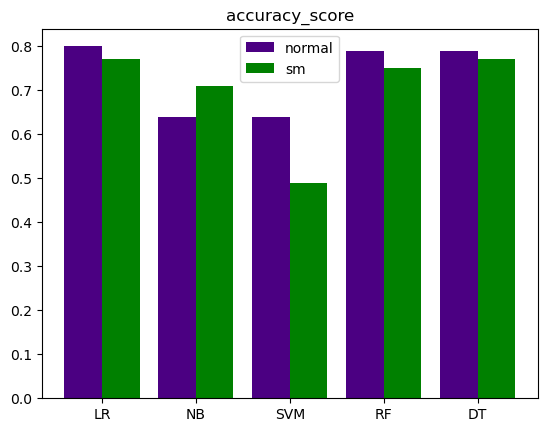

In [96]:
plt.bar(xpos-0.2, accuracy_normal, label = 'normal', width = 0.4, color = 'indigo')
plt.bar(xpos+0.2, accuracy_sm, label = 'sm', width = 0.4, color = 'g')
plt.xticks(xpos, Methods)
plt.title('accuracy_score')
plt.legend()

Insight: LR, DT, RF are equally performing well in smoteenn method

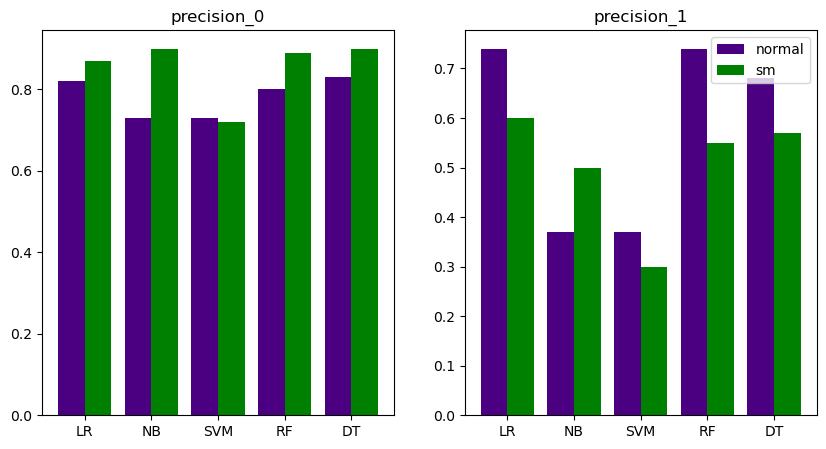

In [97]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.bar(xpos-0.2, precision_normal_0, label = 'normal', width = 0.4, color = 'indigo' )
plt.bar(xpos+0.2, precision_sm_0, label = 'sm', width = 0.4, color = 'g')
plt.xticks(xpos, Methods)
plt.title('precision_0')

plt.subplot(1, 2, 2)
plt.bar(xpos-0.2, precision_normal_1, label = 'normal', width = 0.4, color = 'indigo')
plt.bar(xpos+0.2, precision_sm_1, label = 'sm', width = 0.4, color = 'g')
plt.xticks(xpos, Methods)
plt.title('precision_1')

plt.legend()

### Insight: 
1. NB, RF, DT, LR are performing equally in Precision_0_Sm
2. LR > (DT ~= RF) in precision_1_sm

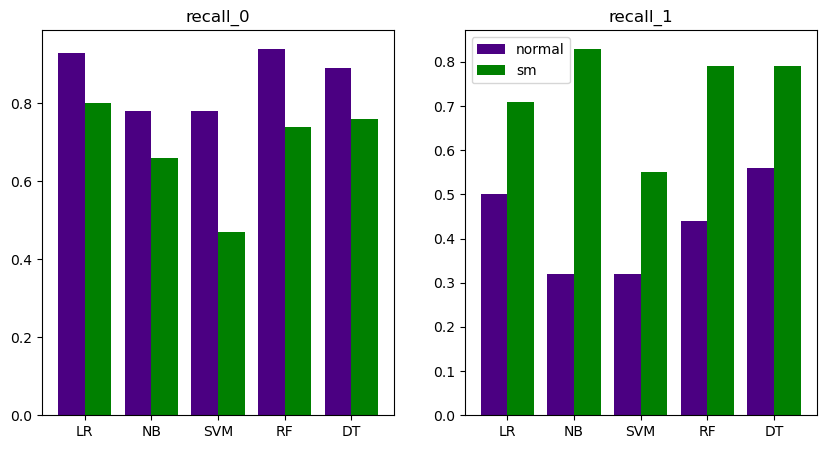

In [98]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.bar(xpos-0.2, recall_normal_0, label = 'normal', width = 0.4, color = 'indigo')
plt.bar(xpos+0.2, recall_sm_0, label = 'sm', width = 0.4, color = 'g')
plt.xticks(xpos, Methods)
plt.title('recall_0')

plt.subplot(1, 2, 2)
plt.bar(xpos-0.2, recall_normal_1, label = 'normal', width = 0.4, color = 'indigo')
plt.bar(xpos+0.2, recall_sm_1, label = 'sm', width = 0.4, color = 'g')
plt.xticks(xpos, Methods)
plt.title('recall_1')
plt.legend()

### Insight:
    
1. LR, DT, RF are best performing in recall_0_sm
2. NB, RF, DT are best performing in recall_1_sm

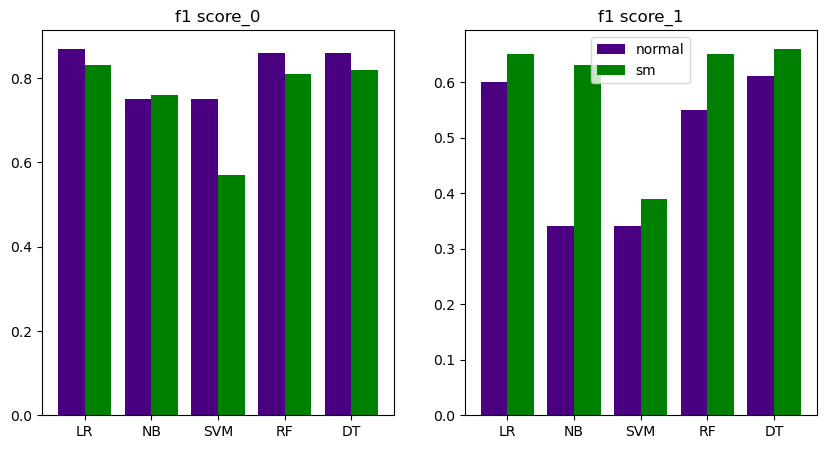

In [99]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.bar(xpos-0.2, f1_normal_0, label = 'normal', width = 0.4, color = 'indigo')
plt.bar(xpos+0.2, f1_sm_0, label = 'sm', width = 0.4, color = 'g')
plt.xticks(xpos, Methods)
plt.title('f1 score_0')

plt.subplot(1, 2, 2)
plt.bar(xpos-0.2, f1_normal_1, label = 'normal', width = 0.4, color = 'indigo')
plt.bar(xpos+0.2, f1_sm_1, label = 'sm', width = 0.4, color = 'g')
plt.xticks(xpos, Methods)
plt.title('f1 score_1')
plt.legend()

### Insight:
    
1. LR, RF, DT are best performing in f1_score_0_sm
2. LR, RF, NB, DT are best performing in f1_score_1_sm

### Conclusion: 

From the above models tested, and by the evaluation of the performance metrics we can infer that 

Logistic regression, Decision Tree and Random Forest classification performed well on the datasets
